In [4]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.28 🚀 Python-3.9.18 torch-2.3.0.dev20240315 CPU (Apple M2)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 181.1/228.3 GB disk)


In [3]:
!yolo task=classify mode=train device=mps model='/Users/fadhilahmad/Documents/apl deteksi sayur/model/yolov8m-cls.pt' data='/Users/fadhilahmad/Documents/apl deteksi sayur/model/dataset' epochs=10 imgsz=64 plots=True

Ultralytics YOLOv8.1.28 🚀 Python-3.9.18 torch-2.3.0.dev20240315 MPS (Apple M2)
engine/trainer: task=classify, mode=train, model=/Users/fadhilahmad/Documents/apl deteksi sayur/model/yolov8m-cls.pt, data=/Users/fadhilahmad/Documents/apl deteksi sayur/model/dataset, epochs=10, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_t

In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8m-cls.pt')  # official model
model = YOLO('/Users/fadhilahmad/Documents/apl deteksi sayur/model/runs/classify/train/weights/best.pt')

# Validate the model
metrics = model.val()  
metrics.top1   
metrics.top5 

Ultralytics YOLOv8.1.28 🚀 Python-3.9.18 torch-2.3.0.dev20240315 CPU (Apple M2)
YOLOv8m-cls summary (fused): 103 layers, 15775466 parameters, 0 gradients, 41.6 GFLOPs
train: /Users/fadhilahmad/Documents/apl deteksi sayur/model/dataset/train... found 10000 images in 10 classes ✅ 
val: /Users/fadhilahmad/Documents/apl deteksi sayur/model/dataset/validation... found 2000 images in 10 classes ✅ 
test: /Users/fadhilahmad/Documents/apl deteksi sayur/model/dataset/test... found 2000 images in 10 classes ✅ 


val: Scanning /Users/fadhilahmad/Documents/apl deteksi sayur/model/dataset/validation... 2000 images, 0 corrupt: 100%|██████████| 2000/2000 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 125/125 [00:41<00:00,  3.01it/s]


                   all      0.997          1
Speed: 0.0ms preprocess, 19.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


1.0

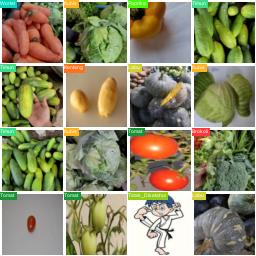

In [7]:
from IPython.display import Image

Image(filename='/Users/fadhilahmad/Documents/apl deteksi sayur/model/runs/classify/train/val_batch0_labels.jpg', width=400)

In [9]:
from ultralytics import YOLO
import numpy as np

model = YOLO('/Users/fadhilahmad/Documents/apl deteksi sayur/model/runs/classify/train/weights/best.pt')  # load a custom model

results = model('/Users/fadhilahmad/Documents/apl deteksi sayur/model/licensed-image.jpeg')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
print(probs)

print(names_dict[np.argmax(probs)])


image 1/1 /Users/fadhilahmad/Documents/apl deteksi sayur/model/licensed-image.jpeg: 64x64 Kentang 0.68, Tidak_Diketahui 0.28, Tomat 0.03, Paprika 0.01, Wortel 0.00, 10.6ms
Speed: 15.0ms preprocess, 10.6ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)
{0: 'Brokoli', 1: 'Kembang_Kol', 2: 'Kentang', 3: 'Kubis', 4: 'Labu', 5: 'Paprika', 6: 'Tidak_Diketahui', 7: 'Timun', 8: 'Tomat', 9: 'Wortel'}
[6.484785990323871e-05, 0.0002137457486242056, 0.6825564503669739, 9.599859367881436e-06, 0.0011376992333680391, 0.006729853805154562, 0.2775125503540039, 0.00011549657938303426, 0.0275465976446867, 0.0041131810285151005]
Kentang
